In [4]:
#Import libraries
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("bmh")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
#list of comapanies included
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
#setting daytime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df= pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-09 00:00:00-05:00,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,AMAZON
2023-01-10 00:00:00-05:00,87.570000,90.190002,87.290001,89.870003,89.870003,67756600,AMAZON
2023-01-11 00:00:00-05:00,90.930000,95.260002,90.930000,95.089996,95.089996,103126200,AMAZON
2023-01-12 00:00:00-05:00,96.930000,97.190002,93.500000,95.269997,95.269997,85254800,AMAZON
2023-01-13 00:00:00-05:00,94.180000,98.370003,94.120003,98.120003,98.120003,85413600,AMAZON
2023-01-17 00:00:00-05:00,98.680000,98.889999,95.730003,96.050003,96.050003,72755000,AMAZON
2023-01-18 00:00:00-05:00,97.250000,99.320000,95.379997,95.459999,95.459999,79570400,AMAZON
2023-01-19 00:00:00-05:00,94.739998,95.440002,92.860001,93.680000,93.680000,69002700,AMAZON
2023-01-20 00:00:00-05:00,93.860001,97.349998,93.199997,97.250000,97.250000,67307100,AMAZON


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-01-24 00:00:00-05:00 to 2023-01-23 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


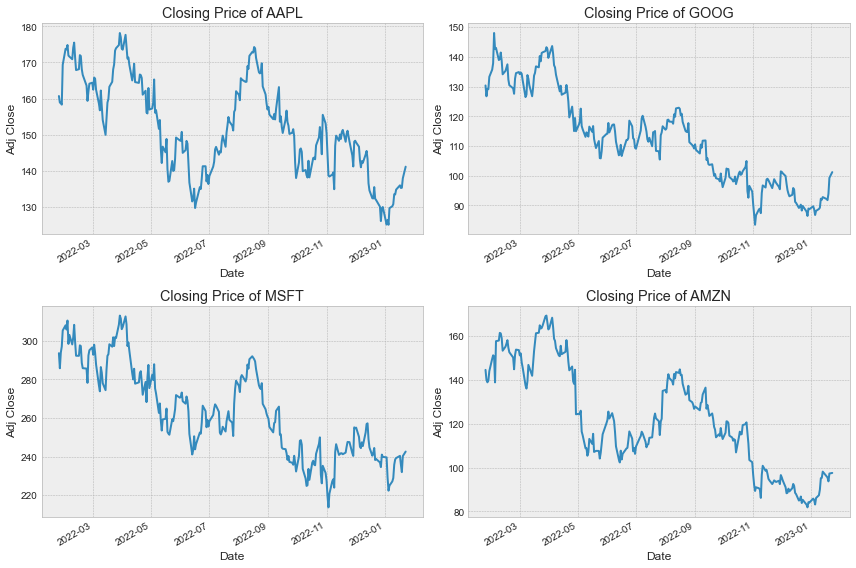

In [7]:
#Plot stock price of 4 companies
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range (1,len(company_name)+1):
    plt.subplot(2,2,i)
    df[df['company_name']==company_name[i-1]]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {tech_list[i-1]}")
plt.tight_layout()

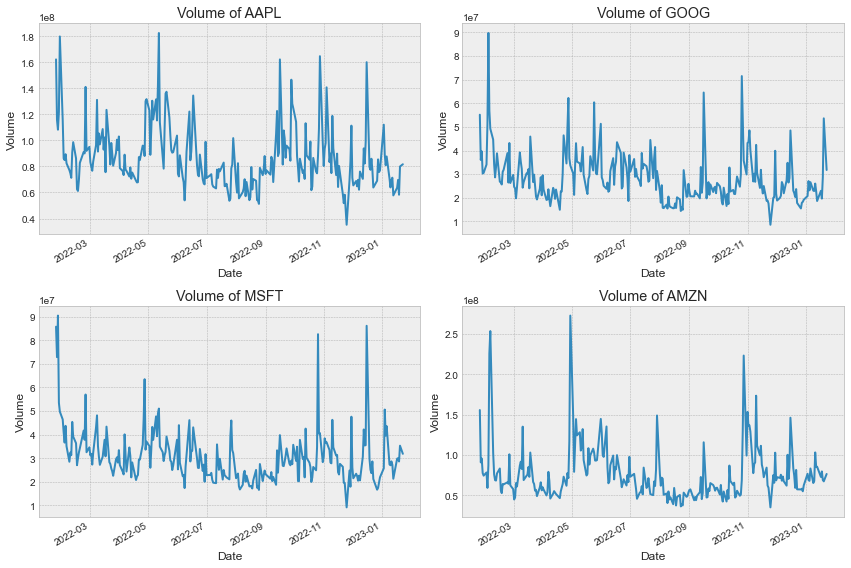

In [8]:
#Plot volumes of 4 companies
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range (1,len(company_name)+1):
    plt.subplot(2,2,i)
    df[df['company_name']==company_name[i-1]]['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Volume of {tech_list[i-1]}")
plt.tight_layout()

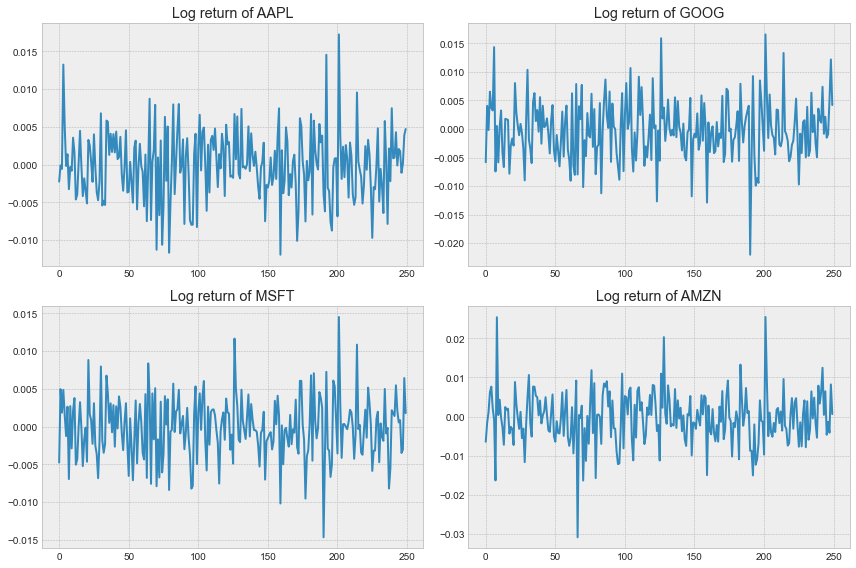

In [9]:
#Create log return data function
def log_return(data):
    return np.diff(np.log(data))
# Log return
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range (1,len(company_name)+1):
    plt.subplot(2,2,i)
    plt.plot(log_return(np.log(df[df['company_name']==company_name[i-1]]['Adj Close'])))
    plt.title(f"Log return of {tech_list[i-1]}")
plt.tight_layout()

In [10]:
#Create Value at Risk function
def VaR_log_normal(s,alpha):
    X= np.diff(np.log(s))
    ev=np.mean(X)
    std_dev= np.sqrt(np.var(X))
    VaR = s[-1]*(1-np.exp(ev+std_dev*scipy.stats.norm.ppf(1-alpha)))
    return VaR
#Apple
print("Value at Risk of Apple Stock with 90% confidence interval: ",VaR_log_normal(AAPL['Adj Close'],0.9))
print("Value at Risk of Apple Stock with 95% confidence interval: ",VaR_log_normal(AAPL['Adj Close'],0.95))
print("Value at Risk of Apple Stock with 99% confidence interval: ",VaR_log_normal(AAPL['Adj Close'],0.99))
#Google
print("Value at Risk of Google Stock with 90% confidence interval: ",VaR_log_normal(GOOG['Adj Close'],0.9))
print("Value at Risk of Google Stock with 95% confidence interval: ",VaR_log_normal(GOOG['Adj Close'],0.95))
print("Value at Risk of Google Stock with 99% confidence interval: ",VaR_log_normal(GOOG['Adj Close'],0.99))
#Microsoft
print("Value at Risk of Microsoft Stock with 90% confidence interval: ",VaR_log_normal(MSFT['Adj Close'],0.9))
print("Value at Risk of Microsoft Stock with 95% confidence interval: ",VaR_log_normal(MSFT['Adj Close'],0.95))
print("Value at Risk of Microsoft Stock with 99% confidence interval: ",VaR_log_normal(MSFT['Adj Close'],0.99))
#Amazon
print("Value at Risk of Amazon Stock with 90% confidence interval: ",VaR_log_normal(AMZN['Adj Close'],0.9))
print("Value at Risk of Amazon Stock with 95% confidence interval: ",VaR_log_normal(AMZN['Adj Close'],0.95))
print("Value at Risk of Amazon Stock with 99% confidence interval: ",VaR_log_normal(AMZN['Adj Close'],0.99))


Value at Risk of Apple Stock with 90% confidence interval:  4.093001061044657
Value at Risk of Apple Stock with 95% confidence interval:  5.211540671469004
Value at Risk of Apple Stock with 99% confidence interval:  7.285164127726279
Value at Risk of Google Stock with 90% confidence interval:  3.2446978246982
Value at Risk of Google Stock with 95% confidence interval:  4.117581385475226
Value at Risk of Google Stock with 99% confidence interval:  5.734042151558249
Value at Risk of Microsoft Stock with 90% confidence interval:  7.0346414369219765
Value at Risk of Microsoft Stock with 95% confidence interval:  8.940907821198213
Value at Risk of Microsoft Stock with 99% confidence interval:  12.475232667569959
Value at Risk of Amazon Stock with 90% confidence interval:  4.0374421361860575
Value at Risk of Amazon Stock with 95% confidence interval:  5.110057478911762
Value at Risk of Amazon Stock with 99% confidence interval:  7.0890207318230205


<AxesSubplot:>

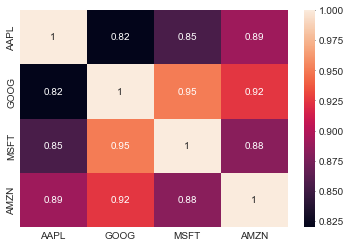

In [11]:
#Correlation between these stock
df_closing=pd.concat([AAPL['Adj Close'],GOOG['Adj Close'],MSFT['Adj Close'],AMZN['Adj Close'],],axis=1)
df_closing.columns = ["AAPL", "GOOG", "MSFT", "AMZN"]
# Calculate the correlation matrix
corr = df_closing.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)
#As we see from the chart, price of big tech companies stock are significantly correlated

In [12]:
#Machine Learning techniques
#Get bigger dataset
#list of comapanies included
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
#setting daytime
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)
for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df= pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-09 00:00:00-05:00,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,AMAZON
2023-01-10 00:00:00-05:00,87.570000,90.190002,87.290001,89.870003,89.870003,67756600,AMAZON
2023-01-11 00:00:00-05:00,90.930000,95.260002,90.930000,95.089996,95.089996,103126200,AMAZON
2023-01-12 00:00:00-05:00,96.930000,97.190002,93.500000,95.269997,95.269997,85254800,AMAZON
2023-01-13 00:00:00-05:00,94.180000,98.370003,94.120003,98.120003,98.120003,85413600,AMAZON
2023-01-17 00:00:00-05:00,98.680000,98.889999,95.730003,96.050003,96.050003,72755000,AMAZON
2023-01-18 00:00:00-05:00,97.250000,99.320000,95.379997,95.459999,95.459999,79570400,AMAZON
2023-01-19 00:00:00-05:00,94.739998,95.440002,92.860001,93.680000,93.680000,69002700,AMAZON
2023-01-20 00:00:00-05:00,93.860001,97.349998,93.199997,97.250000,97.250000,67307100,AMAZON


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10068 entries, 2013-01-24 00:00:00-05:00 to 2023-01-23 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10068 non-null  float64
 1   High          10068 non-null  float64
 2   Low           10068 non-null  float64
 3   Close         10068 non-null  float64
 4   Adj Close     10068 non-null  float64
 5   Volume        10068 non-null  int64  
 6   company_name  10068 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 629.2+ KB


Mean Squared Error: 3.196942423092344


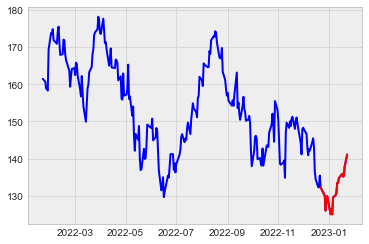

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create lag features
AAPL["Adj Close Lag 1"] = AAPL["Adj Close"].shift(1)
AAPL["Adj Close Lag 2"] = AAPL["Adj Close"].shift(2)
AAPL["Adj Close Lag 3"] = AAPL["Adj Close"].shift(3)
AAPL["Adj Close Lag 4"] = AAPL["Adj Close"].shift(4)
AAPL["Adj Close Lag 5"] = AAPL["Adj Close"].shift(5)

AAPL=AAPL.dropna()

# Define the features and target
X = AAPL[["Adj Close Lag 1", "Adj Close Lag 2", "Adj Close Lag 3", "Adj Close Lag 4", "Adj Close Lag 5"]]
y = AAPL["Adj Close"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

last_month = AAPL[-20:]
last_year=AAPL[-252:]
# Get the last month's "Adj Close" prices
last_month_adj_close = last_month["Adj Close"]
last_year_adj_close = last_year["Adj Close"]

# Get the last month's date
last_month_date = last_month.index
last_year_date = last_year.index

# Use the model to predict the last month's "Adj Close" prices
last_month_predictions = model.predict(last_month[["Adj Close Lag 1", "Adj Close Lag 2", "Adj Close Lag 3", "Adj Close Lag 4", "Adj Close Lag 5"]])

# Plot the last year's "Adj Close" prices
plt.plot(last_year.index, last_year_adj_close, label="Last Year's Adj Close", color='blue')

# Plot the last month's actual "Adj Close" prices
plt.plot(last_month_date, last_month_adj_close,label="Last Month's Adj Close Prediction", color='red')

In [102]:
#Predict APPl price next day
# Get the last 5 rows of the dataframe
last_5_days = AAPL.tail(5)

# Get the last 5 days of "Adj Close" prices
last_5_adj_close = [[last_5_days['Adj Close'][-1],last_5_days['Adj Close Lag 1'][-1],last_5_days['Adj Close Lag 2'][-1],last_5_days['Adj Close Lag 3'][-1],last_5_days['Adj Close Lag 4'][-1]]]
# Use the model to predict the next day's "Adj Close" price
next_day_prediction = model.predict(last_5_adj_close)
print(next_day_prediction)


[140.97708909]


D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [108]:
# Predicting next 30 days Apple stock price
next_30_days=np.empty(30)
next_30_days[0]=model.predict(last_5_adj_close)
last_5_adj_close2=[[model.predict(last_5_adj_close),last_5_days['Adj Close'][-1],last_5_days['Adj Close Lag 1'][-1],last_5_days['Adj Close Lag 2'][-1],last_5_days['Adj Close Lag 3'][-1]]]
next_30_days[1]=model.predict(last_5_adj_close2)
last_5_adj_close3=[[model.predict(last_5_adj_close2),model.predict(last_5_adj_close),last_5_days['Adj Close'][-1],last_5_days['Adj Close Lag 1'][-1],last_5_days['Adj Close Lag 2'][-1]]]
next_30_days[2]=model.predict(last_5_adj_close3)
last_5_adj_close4=[[model.predict(last_5_adj_close3),model.predict(last_5_adj_close2),model.predict(last_5_adj_close),last_5_days['Adj Close'][-1],last_5_days['Adj Close Lag 1'][-1]]]
next_30_days[3]=model.predict(last_5_adj_close4)
last_5_adj_close5=[[model.predict(last_5_adj_close4),model.predict(last_5_adj_close3),model.predict(last_5_adj_close2),model.predict(last_5_adj_close),last_5_days['Adj Close'][-1]]]
next_30_days[4]=model.predict(last_5_adj_close5)
for i in range (5,30,1):
    next_30_days[i]=model.predict([[next_30_days[i-1],next_30_days[i-2],next_30_days[i-3],next_30_days[i-4],next_30_days[i-5]]])
adj_close_30= np.empty(30)
for i in range (0,30,1):
    adj_close_30[i]=next_30_days[i]
print(adj_close_30)




[140.97708909 140.9594522  140.98188546 141.0326079  141.05023358
 141.06968266 141.08946563 141.10971611 141.12962162 141.14954296
 141.16945774 141.18937125 141.20927338 141.22916795 141.24905465
 141.26893358 141.28880463 141.30866784 141.32852321 141.34837075
 141.36821045 141.38804233 141.40786637 141.42768259 141.447491
 141.46729158 141.48708435 141.50686931 141.52664645 141.5464158 ]


D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Users\Dat Truong\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Users\Dat Truong\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
D:\Users\Dat Truong\anaconda3\lib\site-packages

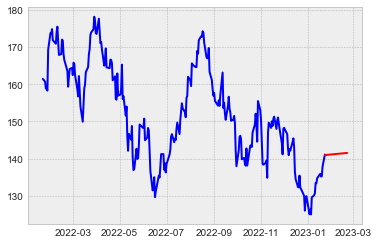

In [109]:
#Ploting
# Get the last year's data
last_year = AAPL[-252:]

# Get the last year's "Adj Close" prices
last_year_adj_close = last_year["Adj Close"]

# Get the last date in the historical data
last_date = last_year.index[-1]

# Create a list of dates starting from the last date in the historical data
date_list = pd.date_range(start=last_date, periods=30, freq='D')

# Plot the last year's "Adj Close" prices
plt.plot(last_year_adj_close, label="Last Year's Adj Close", color='blue')

# Plot the predicted "Adj Close" values for the next month
plt.plot(date_list, adj_close_30, label="Predicted Adj Close", color='red')
#Using lags of Close Price and linear regression method seem to be not efficient to predict future price
